Import applicable libraries and import data from Kaggle API

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import datetime

In [110]:
pwd

'/Users/cbrunson/Desktop/Springboard Data Science'

I will initially clean and explore the "Train" dataset as it contains most of the game play information.

In [111]:
train_data = '/Users/cbrunson/Desktop/Springboard Data Science/data-science-bowl-2019/train.csv'
train = pd.read_csv(train_data)

In [112]:
train.shape

(11341042, 11)

In [359]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8294138 entries, 0 to 8294137
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: int64(3), object(8)
memory usage: 759.4+ MB


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,34ba1a28d02ba8ba,2019-08-06T04:57:18.904Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,4b57c9a59474a1b9,2019-08-06T04:57:45.301Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,2b9d5af79bcdb79f,2019-08-06T04:58:14.538Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06T04:58:14.615Z,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1325467d,2b9d5af79bcdb79f,2019-08-06T04:58:16.680Z,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK


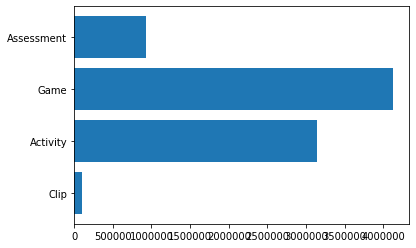

In [378]:
type_freq = collections.Counter(train['type'])
plt.barh(range(len(type_freq)), type_freq.values(), align='center')
plt.yticks(range(len(type_freq)), list(type_freq.keys()))
plt.show()

Here we can see that only 8.2% of the time the app is being used is during an Assessment. It contains over 11 million rows so initially I will focus on cleaning the data to use a sample of game play used during assessments. Kaggle advertised that not every installation_id is associated with an event that includes an assessment. We can see this in the .head() printout above. Multiple clips and activities are associated with the same installation_id. I am only interested in the successes during assessments therefore I will remove all events that are not associated with an assessment.

**Information from Kaggle to further explain the column values**

**event_id** - Randomly generated unique identifier for the event type. Maps to event_id column in specs table.

**game_session** - Randomly generated unique identifier grouping events within a single game or video play session.

**timestamp** - Client-generated datetime

**event_data** - Semi-structured JSON formatted string containing the events parameters. Default fields are: event_count, event_code, and game_time; otherwise fields are determined by the event type.

**installation_id** - Randomly generated unique identifier grouping game sessions within a single installed application instance.

**event_count** - Incremental counter of events within a game session (offset at 1). Extracted from event_data.

**event_code** - Identifier of the event 'class'. Unique per game, but may be duplicated across games. E.g. event code '2000' always identifies the 'Start Game' event for all games. Extracted from event_data.

**game_time** - Time in milliseconds since the start of the game session. Extracted from event_data.

**title** - Title of the game or video.

**type** - Media type of the game or video. Possible values are: 'Game', 'Assessment', 'Activity', 'Clip'.

**world** - The section of the application the game or video belongs to. Helpful to identify the educational curriculum goals of the media. Possible values are: 'NONE' (at the app's start screen), TREETOPCITY' (Length/Height), 'MAGMAPEAK' (Capacity/Displacement), 'CRYSTALCAVES' (Weight).
specs.csv

In [407]:
#find the assessment titles
train_assessment_ids = train[train['type'] == 'Assessment'][['installation_id']].drop_duplicates()
train_assessment = pd.merge(train, train_assessment_ids, on='installation_id', how='inner')
train_assessments = train_assessment[train_assessment['type'] == 'Assessment']

In [408]:
train_assessments.shape

(925345, 11)

In [425]:
#to confirm I'm only working with assessments
assessments_type_freq = collections.Counter(train_assessments['type'])
assessments_type_freq

Counter({'Assessment': 925345})

In [409]:
train_assessments.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
647,3bfd1a65,901acc108f55a5a1,2019-08-06T05:22:01.344Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
648,db02c830,901acc108f55a5a1,2019-08-06T05:22:01.400Z,"{""event_count"":2,""game_time"":37,""event_code"":2...",0006a69f,2,2025,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
649,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:01.403Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
650,a52b92d5,901acc108f55a5a1,2019-08-06T05:22:05.242Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,4,3110,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
651,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:05.244Z,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,5,3010,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY


In [427]:
#count number of installation ids
train_session_freq = train_assessments['installation_id'].unique()
train_session_freq = pd.DataFrame(train_session_freq)
train_session_freq.count()

0    4242
dtype: int64

In [428]:
train_assessment_play = train_assessments['game_session']
train_assessment_play_count = collections.Counter(train_assessment_play)
train_assessment_play_count

Counter({'901acc108f55a5a1': 48,
         '77b8ee947eb84b4e': 87,
         '6bdf9623adc94d89': 35,
         'e7e7db2a241eadcc': 17,
         '9501794defd84e4d': 42,
         'a9ef3ecb3d1acc6a': 32,
         '197a373a77101924': 24,
         '5f4c5e8c961afcf9': 3,
         'b2297d292892745a': 116,
         '957406a905d59afd': 200,
         '34abf0a24c2aaf91': 3,
         'ae691ec5ad5652cf': 40,
         'c046a858e7c8bf03': 64,
         'dc6bc0284039c9fb': 37,
         '7b536271e99518f0': 51,
         '9480b026e3e7d371': 13,
         '55b75073d7a1b491': 8,
         '8fdd5d389d0e272e': 29,
         '36e19d45771e91b4': 28,
         '619b9c069cf790ca': 37,
         '346d5f57cf40bac0': 135,
         '422faba8c6f8c081': 5,
         '67f9274eb736ab3f': 52,
         '03e73cfb40d8d204': 47,
         'cace4c493ac347e3': 92,
         '113a557b60770369': 35,
         'f50104895c55045f': 68,
         '470a1bd6b99152a7': 26,
         '1c48bdca76efc7b0': 38,
         '8f50f2fd987cade4': 46,
         '5

This demonstrates that in many cases there are multiple assessments in an individual game session. I find this interesting and will want to explore this more later.

In [414]:
#count time spent in each world
train_world_time = collections.Counter(assessments['world'])

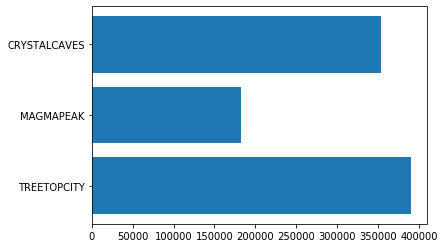

In [415]:
plt.barh(range(len(train_world_time)), train_world_time.values(), align='center')
plt.yticks(range(len(train_world_time)), list(train_world_time.keys()))
plt.show()

In [416]:
train_assessment_titles = train_assessments['title']
train_assessment_titles_count = collections.Counter(train_assessment_titles)
train_assessment_titles_count

Counter({'Mushroom Sorter (Assessment)': 199595,
         'Bird Measurer (Assessment)': 190164,
         'Cauldron Filler (Assessment)': 181925,
         'Cart Balancer (Assessment)': 163343,
         'Chest Sorter (Assessment)': 190318})

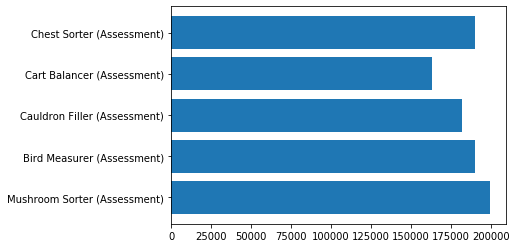

In [417]:
plt.barh(range(len(train_assessment_titles_count)), train_assessment_titles_count.values(), align='center')
plt.yticks(range(len(train_assessment_titles_count)), list(train_assessment_titles_count.keys()))
plt.show()

In [418]:
#need to figure out how to break apart date time stamp to better analyze this data.
date_time = train_assessments['timestamp']

Test data uses the same columns as 'Train' but contains game sessions that include all events leading up to an assessment.

In [403]:
test_data = '/Users/cbrunson/Desktop/Springboard Data Science/data-science-bowl-2019/test.csv' 
test = pd.read_csv(test_data)

In [419]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156414 entries, 0 to 1156413
Data columns (total 11 columns):
event_id           1156414 non-null object
game_session       1156414 non-null object
timestamp          1156414 non-null object
event_data         1156414 non-null object
installation_id    1156414 non-null object
event_count        1156414 non-null int64
event_code         1156414 non-null int64
game_time          1156414 non-null int64
title              1156414 non-null object
type               1156414 non-null object
world              1156414 non-null object
dtypes: int64(3), object(8)
memory usage: 97.1+ MB


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


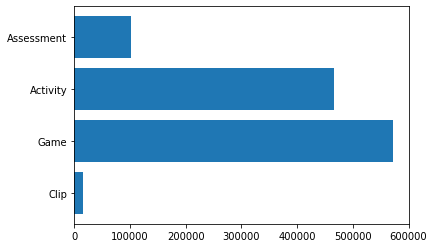

In [422]:
test_type_freq = collections.Counter(test['type'])
plt.barh(range(len(test_type_freq)), test_type_freq.values(), align='center')
plt.yticks(range(len(test_type_freq)), list(test_type_freq.keys()))
plt.show()

In [429]:
test_session_freq = test['installation_id'].unique()
test_session_freq = pd.DataFrame(test_session_freq)
test_session_freq.count()

0    1000
dtype: int64

We can see that Train has 4242 unique 'installation ids' and test has 1000. I want to know if any of the data overlaps between the two datasets.

In [431]:
overlap = set(list(assessments.installation_id.unique())).intersection(set(list(test.installation_id.unique())))
overlap

set()

This outlines that the data is similar but contains no overlaps.

The train labels dataset outlines what "ground truth" looks like for assessments in the train dataset.

In [433]:
train_labels_data = '/Users/cbrunson/Desktop/Springboard Data Science/data-science-bowl-2019/train_labels.csv'
train_labels = pd.read_csv(train_labels_data)

In [434]:
train_labels.info()
train_labels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17690 entries, 0 to 17689
Data columns (total 7 columns):
game_session       17690 non-null object
installation_id    17690 non-null object
title              17690 non-null object
num_correct        17690 non-null int64
num_incorrect      17690 non-null int64
accuracy           17690 non-null float64
accuracy_group     17690 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 967.5+ KB


,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


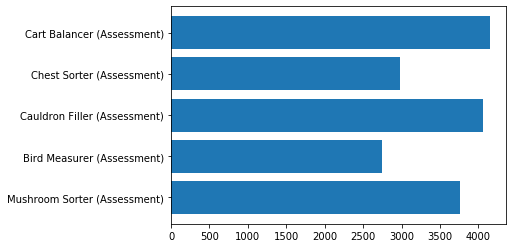

In [437]:
#find the amount of times each assessment was completed
train_labels_assessment_count = collections.Counter(train_labels['title'])
plt.barh(range(len(train_labels_assessment_count)), train_labels_assessment_count.values(), align='center')
plt.yticks(range(len(train_labels_assessment_count)), list(train_labels_assessment_count.keys()))
plt.show()

In [440]:
cart_balancer = train_labels[train_labels['title'] == 'Cart Balancer (Assessment)']
chest_sorter = train_labels[train_labels['title'] == 'Chest Sorter (Assessment)']
cauldron_filler = train_labels[train_labels['title'] == 'Cauldron Filler (Assessment)']
bird_measurer = train_labels[train_labels['title'] == 'MBird Measurer (Assessment)']
mushroom_sorter = train_labels[train_labels['title'] == 'Mushroom Sorter (Assessment)']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4151 entries, 11 to 17680
Data columns (total 7 columns):
game_session       4151 non-null object
installation_id    4151 non-null object
title              4151 non-null object
num_correct        4151 non-null int64
num_incorrect      4151 non-null int64
accuracy           4151 non-null float64
accuracy_group     4151 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 259.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2981 entries, 10 to 17681
Data columns (total 7 columns):
game_session       2981 non-null object
installation_id    2981 non-null object
title              2981 non-null object
num_correct        2981 non-null int64
num_incorrect      2981 non-null int64
accuracy           2981 non-null float64
accuracy_group     2981 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 186.3+ KB
